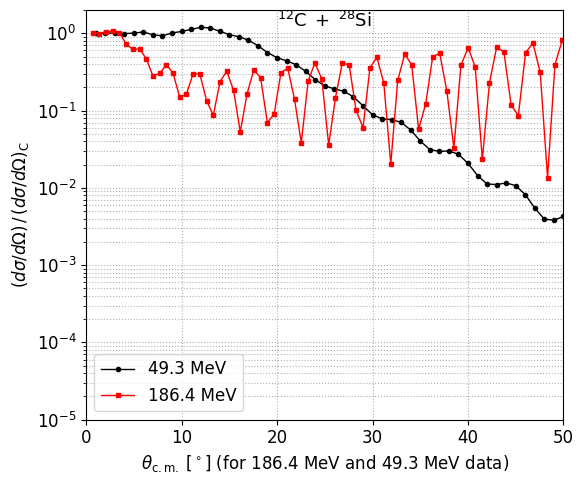

In [30]:
# cross_section_sigma_over_sigmaC.py
#
# Reproduce, as closely as possible, the published figure for 12C + 28Si
# elastic scattering at 49.3 MeV and 186.4 MeV:
#   (dσ/dΩ)/(dσ/dΩ)_Coulomb  versus  θ_cm  (degrees)
#
# ── Usage ────────────────────────────────────────────────────────────────
# • Place this script in the SAME directory as the two JSON files
#     ├── 49.3.dat.json      (E_lab = 49.3 MeV)
#     └── 186.4.dat.json     (E_lab = 186.4 MeV)
# • In a Jupyter notebook running under WSL do:
#       %run cross_section_sigma_over_sigmaC.py
# • A single log-scale plot will appear, with the x-axis limited to
#   0–50° and the y-axis showing σ/σ_C (arbitrary units if already normalised
#   in the JSON; otherwise genuine σ/σ_C after division by the Rutherford
#   formula—see code).
#
# Author : ChatGPT assistant (Noa)

import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1.  Files, physical constants, helper functions
# ----------------------------------------------------------------------
FILES = {
    49.3:  Path("49.3.dat.json"),
    186.4: Path("186.4.dat.json"),
}

Z1, Z2 = 6, 14                         #Charges for 12C and 28Si
E_TO_J = 1.602176634e-13               # 1 MeV in joules
HBAR_C = 197.3269804                   # MeV·fm
ELEM_CHARGE = 1.439964548              # (e²)/(4πϵ₀) in MeV·fm

def rutherford_cm(theta_deg, e_lab_mev, m1=12, m2=28):
    """
    Rutherford differential cross-section in centre-of-mass frame
    (units: fm² sr⁻¹).  Non-relativistic kinematics assumed.
    """
    theta = np.radians(theta_deg) / 2
    # Convert to CM energy (MeV) for non-relativistic kinematics
    mu = m1 * m2 / (m1 + m2)                       # in amu
    E_cm = e_lab_mev * m2 / (m1 + m2)              # simple two-body kinematics
    factor = (Z1 * Z2 * ELEM_CHARGE / (2 * E_cm))**2
    return factor / np.sin(theta)**4               # fm²/sr

# ----------------------------------------------------------------------
# 2.  Plot σ/σ_C for each energy
# ----------------------------------------------------------------------
plt.rcParams.update({"font.size": 12})
fig, ax = plt.subplots(figsize=(6, 5))

COL = {49.3: "k", 186.4: "r"}
MRK = {49.3: "o", 186.4: "s"}

for E, fname in FILES.items():
    with fname.open() as f:
        data = json.load(f)

    theta = np.asarray(data["cs"]["Theta"], dtype=float)
    dsdo  = np.asarray(data["cs"]["cs"],   dtype=float)     # total differential xs

    # Detect whether JSON already contains σ/σ_C: near unity at small θ
    already_normalised = np.isclose(dsdo[0], 1.0, rtol=0.2)

    #if already_normalised:
    sigma_over_sigmaC = dsdo
    #else:
        # Divide by Rutherford cross-section
       # sigmaC = rutherford_cm(theta, E)           # fm²/sr
       # sigma_over_sigmaC = dsdo / sigmaC

    ax.semilogy(theta, sigma_over_sigmaC,
                marker=MRK[E], ms=3,
                color=COL[E],  lw=1.0,
                label=f"{E:.1f} MeV")

# ----------------------------------------------------------------------
# 3.  Cosmetics to mimic the reference plot
# ----------------------------------------------------------------------
ax.set_xlim(0, 50)                                 # θ up to 50°
ax.set_ylim(1e-5, 2)                               # log scale limits

ax.set_xlabel(r"$\theta_{\mathrm{c.m.}}\;[^\circ]\; \text{(for 186.4 MeV and 49.3 MeV data)}$")
ax.set_ylabel(r"$(d\sigma/d\Omega)\,/\,(d\sigma/d\Omega)_\mathrm{C}$")

# Text annotations similar to the paper
ax.text(20, 1.2,  r"$^{12}\mathrm{C}\;+\;^{28}\mathrm{Si}$", fontsize=13)


ax.grid(True, which="both", ls=":")
ax.legend()
plt.tight_layout()
plt.savefig("imagen.pdf")
plt.show()


In [23]:
R= 6.3912

r=R/((12**(1/3)))
print(r)

2.791613733111317
